<a href="https://www.kaggle.com/code/kusumakar/bear-attack-analysis?scriptVersionId=198041238" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bear-attacks-north-america/data (3).csv


In [2]:
df=pd.read_csv("/kaggle/input/bear-attacks-north-america/data (3).csv")

In [3]:
df.head()

,Name,age,gender,Date,Month,Year,Type,Location,Description,Type of bear,Hunter,Grizzly,Hikers,Only one killed,Latitude,Longitude
0,Mary Porterfield,3.0,female,19/05/1901,May,1901,Wild,"Job, West Virginia",The children were gathering flowers near their...,Black bear,0,0,0,0,38.864277,-79.556998
1,Wilie Porterfield,5.0,male,19/05/1901,May,1901,Wild,"Job, West Virginia",The children were gathering flowers near their...,Black bear,0,0,0,0,38.864277,-79.556998
2,Henry Porterfield,7.0,male,19/05/1901,May,1901,Wild,"Job, West Virginia",The children were gathering flowers near their...,Black bear,0,0,0,0,38.864277,-79.556998
3,John Dicht,18.0,male,24/11/1906,Nov,1906,Wild,"Elk County, Pennsylvania","Thinking the bear was dead, Dicht began skinni...",Black bear,0,0,0,1,41.437362,-78.626009
4,Baby Laird,1.0,NaN,05/10/1908,Oct,1908,Captive,"Tucson, Arizona",After a bear escaped from a cage at Elysian Gr...,Black bear,0,0,0,1,32.222876,-110.974847


## Selecting relevant columns for analysis

In [4]:
df_relevant = df.copy()
df_relevant.drop( columns = ['Name','Date','Description','Latitude','Longitude'],inplace=True)

In [5]:
df_relevant.dtypes

 age               float64
gender              object
Month               object
Year                 int64
Type                object
Location            object
Type of bear        object
Hunter               int64
Grizzly              int64
Hikers               int64
Only one killed      int64
dtype: object

## Total Nulls

In [6]:
df_relevant.isnull().sum()

 age               2
gender             1
Month              0
Year               0
Type               0
Location           0
Type of bear       0
Hunter             0
Grizzly            0
Hikers             0
Only one killed    0
dtype: int64

## Total Data

In [7]:
# Total Data Points
df_relevant.shape

(166, 11)

In [8]:
df_relevant.dropna(inplace=True)
df_relevant[' age']=df_relevant[' age'].astype(int)
df_relevant['Count']=1

In [9]:
# Gender column has some spaces in the values. We will remove the spaces
df_relevant['gender']=df_relevant.gender.apply(lambda s:s.strip())


# Lets bin the ages into age groups
bins = [-1, 10, 20, 30,40,50,60,70,80,90,100]
df_relevant['binned_Ages'] = pd.cut(df_relevant[' age'], bins)
df_group = df_relevant.groupby(['Type of bear','gender','binned_Ages']).agg({'Count':sum}).reset_index()

/tmp/ipykernel_17/640672017.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_group = df_relevant.groupby(['Type of bear','gender','binned_Ages']).agg({'Count':sum}).reset_index()
/tmp/ipykernel_17/640672017.py:8: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_group = df_relevant.groupby(['Type of bear','gender','binned_Ages']).agg({'Count':sum}).reset_index()


In [10]:
df_group

,Type of bear,gender,binned_Ages,Count
0,Black bear,female,"(-1, 10]",9
1,Black bear,female,"(10, 20]",1
2,Black bear,female,"(20, 30]",5
3,Black bear,female,"(30, 40]",5
4,Black bear,female,"(40, 50]",2
5,Black bear,female,"(50, 60]",0
6,Black bear,female,"(60, 70]",2
7,Black bear,female,"(70, 80]",2
8,Black bear,female,"(80, 90]",0
9,Black bear,female,"(90, 100]",1


# Attacks based on Gender

<Axes: xlabel='Type of bear', ylabel='Count'>

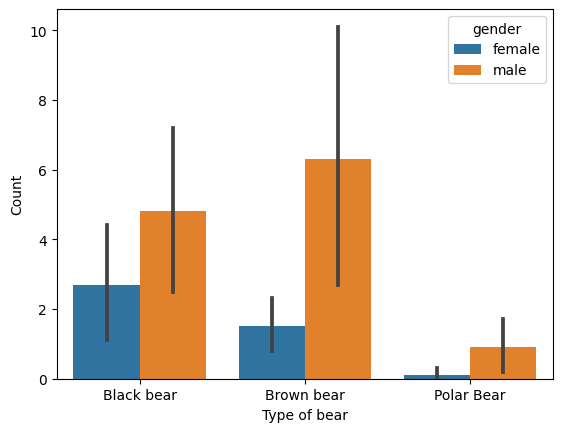

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x='Type of bear',y='Count',hue='gender', data=df_group)

In [12]:
df_relevant

,age,gender,Month,Year,Type,Location,Type of bear,Hunter,Grizzly,Hikers,Only one killed,Count,binned_Ages
0,3,female,May,1901,Wild,"Job, West Virginia",Black bear,0,0,0,0,1,"(-1, 10]"
1,5,male,May,1901,Wild,"Job, West Virginia",Black bear,0,0,0,0,1,"(-1, 10]"
2,7,male,May,1901,Wild,"Job, West Virginia",Black bear,0,0,0,0,1,"(-1, 10]"
3,18,male,Nov,1906,Wild,"Elk County, Pennsylvania",Black bear,0,0,0,1,1,"(10, 20]"
5,61,male,Sep,1916,Wild,"Yellowstone National Park, Wyoming",Brown bear,0,0,0,1,1,"(60, 70]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,31,male,Jul,2018,Wild,"Sentry Island, Nunavut",Polar Bear,0,0,0,1,1,"(30, 40]"
162,37,male,Sep,2018,Wild,"Teton Wilderness, Wyoming",Brown bear,0,0,0,1,1,"(30, 40]"
163,18,male,Oct,2018,Wild,"Admiralty Island, Alaska",Brown bear,0,0,0,1,1,"(10, 20]"
164,37,female,Nov,2018,Wild,"Einarson Lake, Yukon",Brown bear,0,0,0,0,1,"(30, 40]"


## Attacks based on Age Group

/tmp/ipykernel_17/2536046171.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_group_age= df_relevant.groupby(['Type of bear','binned_Ages']).agg({"Count":sum}).reset_index()
/tmp/ipykernel_17/2536046171.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_group_age= df_relevant.groupby(['Type of bear','binned_Ages']).agg({"Count":sum}).reset_index()


<Axes: xlabel='Type of bear', ylabel='Count'>

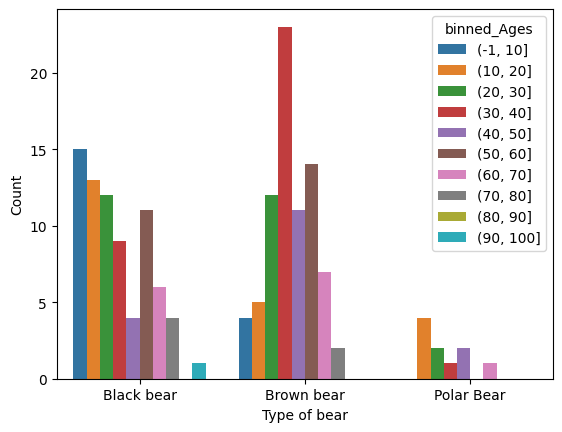

In [13]:
df_group_age= df_relevant.groupby(['Type of bear','binned_Ages']).agg({"Count":sum}).reset_index()
sns.barplot(x='Type of bear',y='Count',hue='binned_Ages', data=df_group_age)

In [14]:
df_time_group = df_relevant.groupby(['Type of bear','Month']).agg({'Count':sum}).reset_index()

/tmp/ipykernel_17/3233791865.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_time_group = df_relevant.groupby(['Type of bear','Month']).agg({'Count':sum}).reset_index()


# Analysis of Time : Which month there were more attacks

<Axes: xlabel='Type of bear', ylabel='Count'>

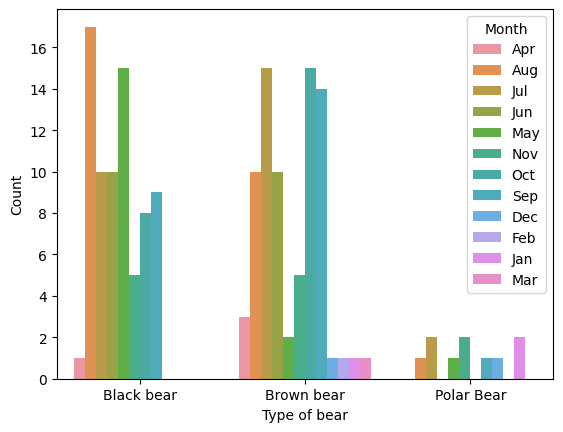

In [15]:
df_time_group
sns.barplot(x='Type of bear',y='Count',hue='Month', data=df_time_group)

## INFERENCES

1. Most of the attacks happen during July & August
2. Brown bear is more dangerous than other bears
3. Brown bear targets people mostly from 30-40 age group whereas Black one targets kids
4.Males are attacked more compared to females